## Week 9 
Point Patterns 

In [1]:
##import 
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata
import seaborn as sns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

##read selected file
df = pd.read_csv('covid_collision_trimmed.csv')

In [2]:
df.head(3)

,Unnamed: 0,Date_Occurred,Time_Occurred,Area_ID,Area_Name,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Address,Cross_Street,Location,Latitude,Longitude,geometry
0,0,2020-03-19,2250,2,Rampart,3101 3401 3701 0605 3029 3036 3004 3026,26.0,Male,"Hispanic, Latin, Mexican",WILLOW BROOK AV,VERMONT AV,"(34.0895, -118.2917)",34.0895,-118.2917,POINT (-118.2917 34.0895)
1,1,2020-03-19,1405,21,Topanga,3003 3037 3029 3034 3026 3101 4026,25.0,Female,Black,VENTURA,QUAKERTOWN,"(34.1714, -118.5698)",34.1714,-118.5698,POINT (-118.5698 34.1714)
2,2,2020-03-19,1450,1,Central,3101 3401 3701 0605 3004,89.0,Male,Other,OLYMPIC,S BROADWAY,"(34.0409, -118.2574)",34.0409,-118.2574,POINT (-118.2574 34.0409)


In [3]:
#Filter

df=df[['Date_Occurred','Time_Occurred','Area_Name','MO_Codes','Victim_Age','Victim_Sex','Victim_Descent','Latitude','Longitude','geometry']]


In [4]:
df.head(1)

,Date_Occurred,Time_Occurred,Area_Name,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Latitude,Longitude,geometry
0,2020-03-19,2250,Rampart,3101 3401 3701 0605 3029 3036 3004 3026,26.0,Male,"Hispanic, Latin, Mexican",34.0895,-118.2917,POINT (-118.2917 34.0895)


In [5]:
df = gpd.GeoDataFrame(df, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(df.Longitude, df.Latitude))


In [6]:
df.drop(df[df.Longitude==0.0000].index,inplace=True)

In [7]:
df.Longitude = df.Longitude.astype('float')
df.Latitude = df.Latitude.astype('float')


In [8]:
df=df.to_crs('EPSG:3857')

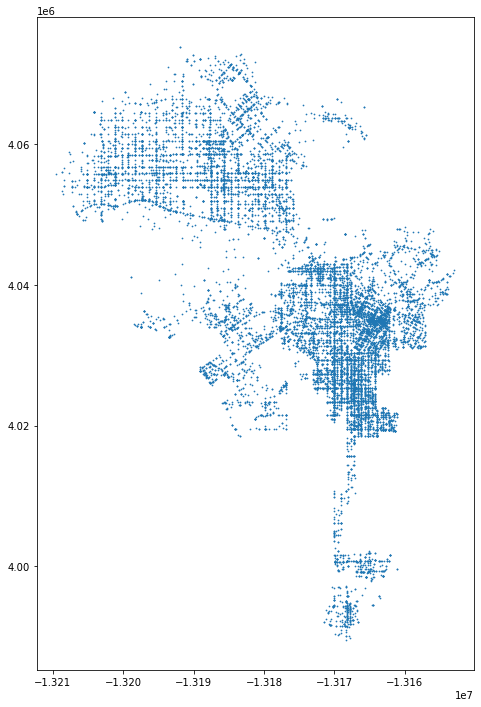

In [9]:
#Plot

df.plot(figsize=(12,12),markersize=0.5)

In [10]:
df.Victim_Descent.value_counts()

Hispanic, Latin, Mexican           6425
Black                              2623
White                              2433
Other                              1406
Unknown                             664
Other Asian                         404
Korean                               56
Filipino                             21
Chinese                              13
Asian Indian                          7
American Indian, Alaskan Native       5
Hawaiian                              4
Vietnamese                            4
Pacific Islander                      3
Guamanian                             2
Japanese                              2
Laotian                               1
Samoan                                1
Name: Victim_Descent, dtype: int64

In [11]:
top_25_races = df.Victim_Descent.value_counts().head(25).index.tolist()
top_25_races

['Hispanic, Latin, Mexican',
 'Black',
 'White',
 'Other',
 'Unknown',
 'Other Asian',
 'Korean',
 'Filipino',
 'Chinese',
 'Asian Indian',
 'American Indian, Alaskan Native',
 'Hawaiian',
 'Vietnamese',
 'Pacific Islander',
 'Guamanian',
 'Japanese',
 'Laotian',
 'Samoan']

,Date_Occurred,Time_Occurred,Area_Name,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Latitude,Longitude,geometry
0,2020-03-19,2250,Rampart,3101 3401 3701 0605 3029 3036 3004 3026,26.0,Male,"Hispanic, Latin, Mexican",34.0895,-118.2917,POINT (-13168171.809 4040826.030)
4,2020-03-19,1845,Newton,3101 3401 3701 3004 3029 3026 3104 0605,33.0,Female,"Hispanic, Latin, Mexican",33.9917,-118.2564,POINT (-13164242.231 4027687.593)
5,2020-03-19,2030,Newton,3101 3401 3701 3008 3026 3029 3036 0605,36.0,Male,"Hispanic, Latin, Mexican",34.0191,-118.2629,POINT (-13164965.808 4031366.978)
10,2020-03-19,1840,Hollenbeck,3101 3401 3701 3004 3026 3036 0605,36.0,Male,"Hispanic, Latin, Mexican",34.0949,-118.1645,POINT (-13154011.970 4041551.907)
12,2020-03-19,1315,Hollenbeck,3101 3401 3701 0605 3004 3025,31.0,Male,"Hispanic, Latin, Mexican",34.0678,-118.2024,POINT (-13158230.979 4037909.547)


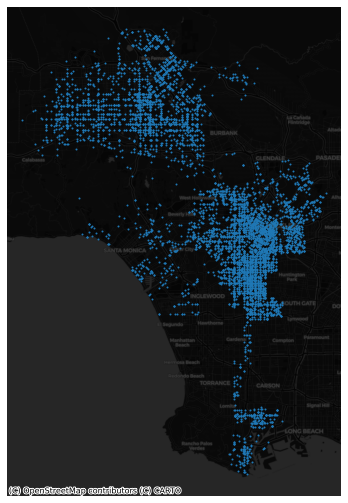

In [12]:
# table
display(df[df.Victim_Descent == 'Hispanic, Latin, Mexican'].head()) 

# map
ax = df[df.Victim_Descent == 'Hispanic, Latin, Mexican'].plot(figsize=(9,9), markersize=1)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [13]:
# create a function
def collision_by_race(race='Hispanic, Latin, Mexican'):
    # table
    display(df[df.Victim_Descent == race].head()) 

    # map
    ax = df[df.Victim_Descent == race].plot(figsize=(9,9), markersize=1)

    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

,Date_Occurred,Time_Occurred,Area_Name,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Latitude,Longitude,geometry
1,2020-03-19,1405,Topanga,3003 3037 3029 3034 3026 3101 4026,25.0,Female,Black,34.1714,-118.5698,POINT (-13199129.759 4051840.144)
6,2020-03-19,320,Newton,3101 3401 3701 3004 3024 0605,22.0,Male,Black,33.9824,-118.2783,POINT (-13166680.128 4026439.021)
21,2020-03-19,1330,Newton,3101 3401 3701 3004 3030 0605,40.0,Female,Black,33.9892,-118.2739,POINT (-13166190.322 4027351.942)
44,2020-03-19,1345,Van Nuys,3004 3037 3026 3101 4026,26.0,Female,Black,34.1603,-118.4662,POINT (-13187597.060 4050346.763)
46,2020-03-19,1525,Southeast,4025 3036 3004 3028 3030 3101,41.0,Female,Black,33.9382,-118.2916,POINT (-13168160.677 4020506.812)


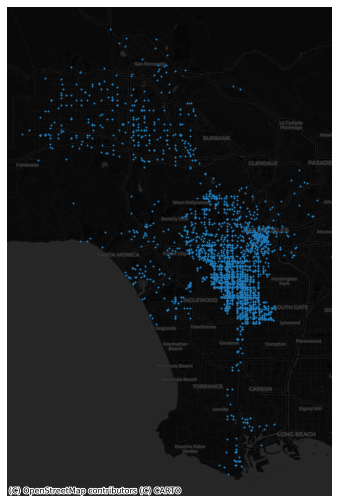

In [14]:
# call the function 
collision_by_race(race='Black')

In [18]:
#Make it interactive

@interact

def collision_by_race(race=top_25_races):
    # table
    display(df[df.Victim_Descent == race].head()) 

    # map
    ax = df[df.Victim_Descent == race].plot(figsize=(9,9), markersize=1)

    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='race', options=('Hispanic, Latin, Mexican', 'Black', 'White', 'Oth…

In [21]:
#Include area: 
    
@interact

def collision_by_race(race=top_25_races,
                      area=df.Area_Name.unique().tolist()):
    # table
    display(df[(df.Victim_Descent == race)&(df.Area_Name==area)].head()) 

    # map
    ax = df[(df.Victim_Descent == race)&(df.Area_Name==area)].plot(figsize=(9,9), markersize=1)

    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='race', options=('Hispanic, Latin, Mexican', 'Black', 'White', 'Oth…

In [22]:
df = df.to_crs('EPSG:3857')

df['x'] = df.geometry.x
df['y'] = df.geometry.y

In [23]:
df.head(1)

,Date_Occurred,Time_Occurred,Area_Name,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Latitude,Longitude,geometry,x,y
0,2020-03-19,2250,Rampart,3101 3401 3701 0605 3029 3036 3004 3026,26.0,Male,"Hispanic, Latin, Mexican",34.0895,-118.2917,POINT (-13168171.809 4040826.030),-1.316817e+07,4.040826e+06


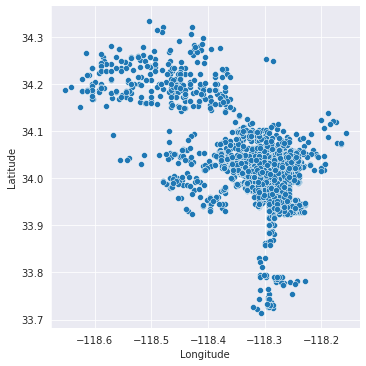

In [25]:
#Seaborn plot simple 

sns.set_style('darkgrid')

data_black = df[df.Victim_Descent.isin(['Black'])]
sns.relplot(data = data_black,
              x='Longitude', 
              y='Latitude')

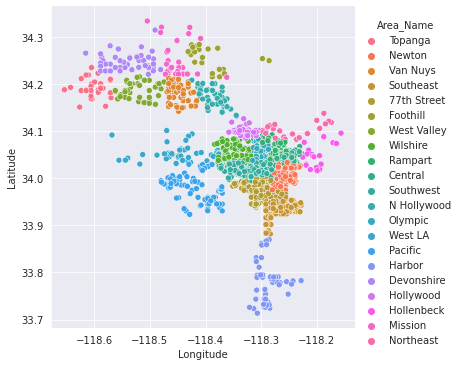

In [26]:
#Seaborn Plot by area

sns.relplot(data = data_black,
              x='Longitude', 
              y='Latitude',
              hue='Area_Name')

In [27]:
#Interactive seaborn plot 

@interact

def collision_areas(area = df.Area_Name.unique().tolist()):
    sns.relplot(data = df[df['Area_Name'] == area],
            x='Longitude', 
            y='Latitude',
            hue='Victim_Descent',
            style='Victim_Descent')

interactive(children=(Dropdown(description='area', options=('Rampart', 'Topanga', 'Central', 'N Hollywood', 'N…

In [31]:
#Interactive Victim Descent by area  

@interact

def collision_areas(area = df.Area_Name.unique().tolist()):
    sns.jointplot(data = df[df['Area_Name'] == area],
                  x='x', 
                  y='y',
                  hue='Victim_Descent',
                  s=10)

interactive(children=(Dropdown(description='area', options=('Rampart', 'Topanga', 'Central', 'N Hollywood', 'N…

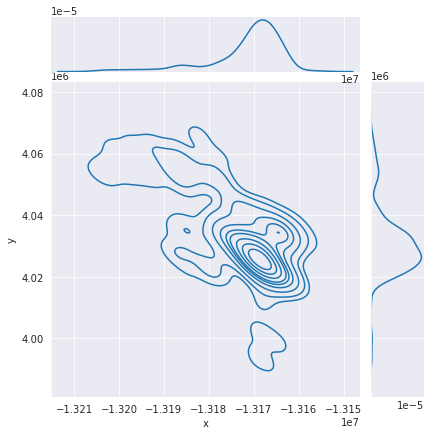

In [32]:
#KDE Plot

sns.jointplot(data = data_black,
              x='x', 
              y='y', 
              kind='kde')

## Heatmap

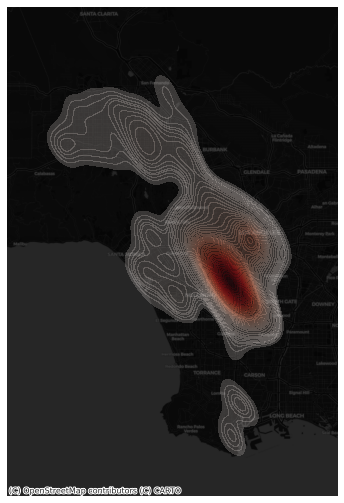

In [33]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# kdeplot
sns.kdeplot(x = data_black.x, 
            y = data_black.y,
            n_levels=50, 
            shade=True,
            thresh=0.05,
            alpha=0.2, 
            cmap='Reds')

# axes
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [35]:
#get the mean and median

mean_center = centrography.mean_center(df[['x','y']])
med_center = centrography.euclidean_median(df[['x','y']])

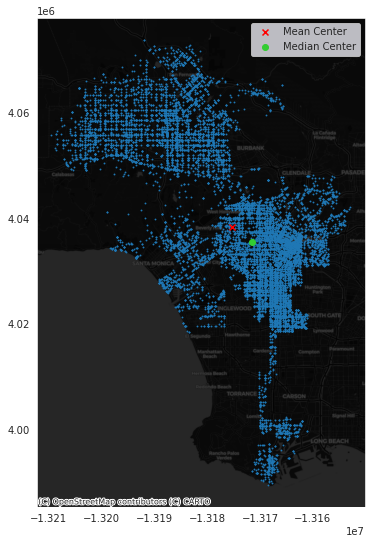

In [36]:
#Plot the mean and median 

# set the style 
sns.set_style('dark')

#figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(df['x'], df['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

# Display
plt.show()

In [37]:
major, minor, rotation = centrography.ellipse(df[['x','y']])

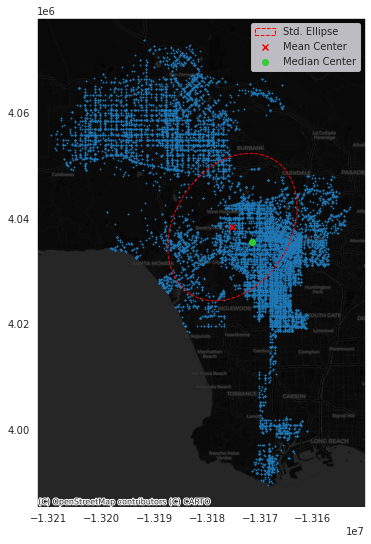

In [38]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(df['x'], df['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

# Display
plt.show()

interactive(children=(Dropdown(description='area', options=('Rampart', 'Topanga', 'Central', 'N Hollywood', 'N…

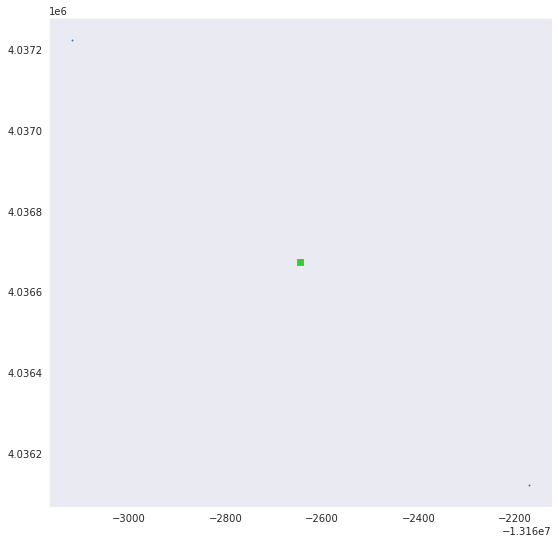

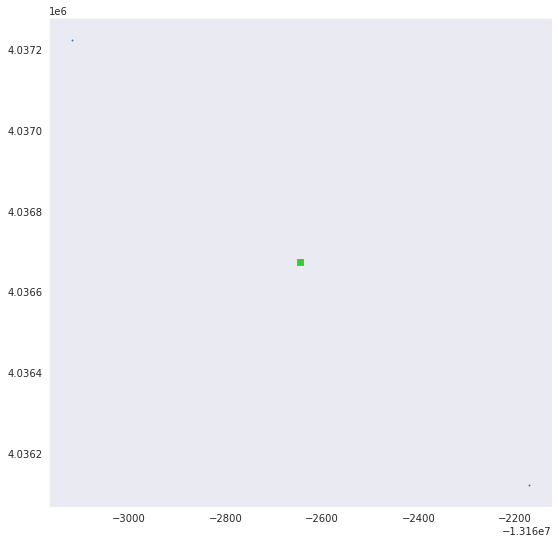

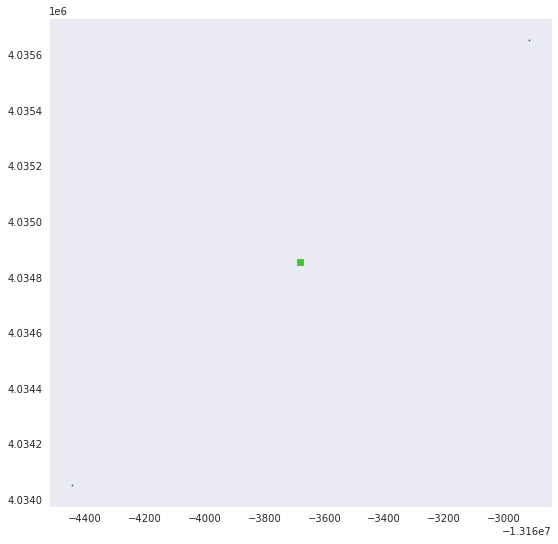

In [40]:
@interact
def collision_ellipse(area=df.Area_Name.unique().tolist(),
                  race=df.Victim_Descent.unique().tolist()):
    
    # filter the data by race
    df_filtered = df[(df.Victim_Descent == race)&(df.Area_Name== area)]

    # mean center and median
    mean_center = centrography.mean_center(df_filtered[['x','y']])
    med_center = centrography.euclidean_median(df_filtered[['x','y']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(df_filtered[['x','y']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(9, 9))

    # plot arrest points
    ax.scatter(df_filtered['x'], df_filtered['y'], s=0.75)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # heatmap
    sns.kdeplot(x = df_filtered.geometry.x, 
                y = df_filtered.geometry.y,
                n_levels=20, 
                shade=False,
                thresh=0.1,
                alpha=0.3, 
                cmap='Reds', 
                ax=ax)

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    ax.legend()

    ax.axis('Off')

    ax.set_title(str(len(df_filtered)) + ' incidents of collisions with reported victim descent "' + race + '"')

    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
    # Display
    plt.show()

## What this Means

Based on the many graphs created in this notebook, we see that there is a high concentration of collisions in the Downtown area. Due to the vast area of the city, the mean and median are central area, which more or less corresponds with the concentrations of collisions. 

In most of the ellipse area maps we see vary from area to area, understandably. The size of the ellipse seems to depend on the size of the area, for example, the Harbor district in the south of LA City, which is more of an ellipse shape versus the Central-Downtown area, which is more circular.  

For races, the race with the highest collisions is Hispanic, Latin, Mexican followed by Black and White, respectively. 

## Contribution

Karen: worked on the Pre-COVID notebook 
Natalie: worked on the during-COVID notebook